# Netflix EDA & Interactive Dashboard

This notebook provides a comprehensive exploratory data analysis (EDA) of Netflix's global content catalog, leveraging both static and interactive visualizations to uncover key insights and trends.

## Netflix Brand Palette
Throughout this notebook, we use the official Netflix color palette for all visualizations:
- `#221f1f` (Netflix Black)
- `#b20710` (Netflix Red)
- `#e50914` (Accent Red)
- `#f5f5f1` (Off White)

## Dashboard Overview
The interactive dashboard at the end of this notebook summarizes the most important aspects of the Netflix catalog:
- **Top Countries**: Bar chart showing the top 10 countries by content count.
- **Release Trends**: Line chart visualizing the number of Movies and TV Shows released over time.
- **Genre Distribution**: Horizontal bar chart of the most common genres on Netflix.
- **Rating Breakdown**: Pie chart of content ratings, highlighting the diversity of target audiences.

## How to Use
- Hover over any chart to see detailed values.
- Use interactive legends and dropdowns (where available) to filter or highlight specific data.
- All charts use the Netflix palette for clarity and brand consistency.

## Key Insights
- The USA, India, and the UK are the most prolific content producers on Netflix.
- There has been a surge in content releases since 2015, especially for Movies.
- Drama, International Movies, and Comedies are among the most common genres.
- The majority of content is rated for adults and teens, but there is a significant offering for kids as well.

## Credits

- This notebook is inspired by and builds upon the excellent work of [Josh Swords: Netflix Data Visualization](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook).
- Timeline visualization code adapted from [Subin An's Titanic Visualization](https://www.kaggle.com/code/subinium/awesome-visualization-with-titanic-dataset).
- Age rating mapping adapted from [AndresHG's Netflix EDA](https://www.kaggle.com/code/andreshg/eda-beginner-to-expert-plotly).
- Additional ideas and color palette from the official Netflix brand guidelines.
- All code for data wrangling, EDA, and dashboarding is original unless otherwise referenced above.

---

_Proceed below to explore the data, visualizations, and the interactive dashboard!_

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

In [109]:
os.makedirs('figures', exist_ok=True)

df = pd.read_csv('data/netflix_titles_cleaned.csv')
print(df.shape)
display(df.head())

(8804, 17)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,duration_minutes,duration_seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,90,1
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,98,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,98,1
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021,98,1
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021,98,2


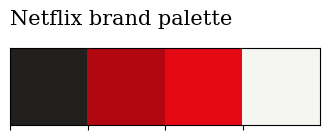

In [110]:
# Palette
sns.palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])

plt.title("Netflix brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

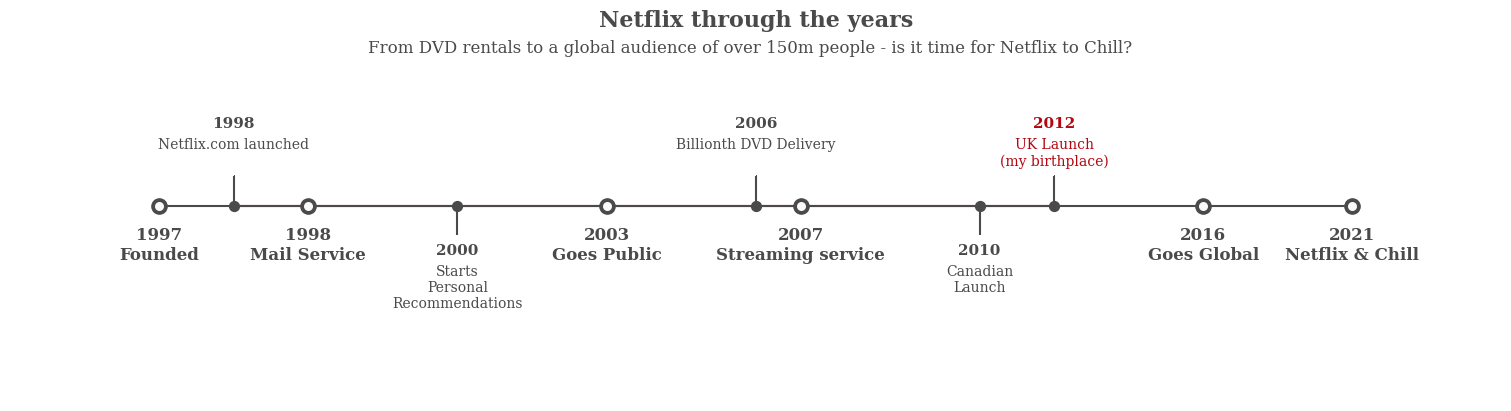

In [111]:
# Cell for timeline visualization, code from Subin An's awesome notebook https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset
## these go on the numbers below
tl_dates = [
    "1997\nFounded",
    "1998\nMail Service",
    "2003\nGoes Public",
    "2007\nStreaming service",
    "2016\nGoes Global",
    "2021\nNetflix & Chill"
]

tl_x = [1, 2, 4, 5.3, 8,9]

## these go on the numbers
tl_sub_x = [1.5,3,5,6.5,7]

tl_sub_times = [
    "1998","2000","2006","2010","2012"
]

tl_text = [
    "Netflix.com launched",
    "Starts\nPersonal\nRecommendations","Billionth DVD Delivery","Canadian\nLaunch","UK Launch\n(my birthplace)"]

# Set figure & Axes
fig, ax = plt.subplots(figsize=(15, 4), constrained_layout=True)
ax.set_ylim(-2, 1.75)
ax.set_xlim(0, 10)

# Timeline : line
ax.axhline(0, xmin=0.1, xmax=0.9, c='#4a4a4a', zorder=1)

# Timeline : Date Points
ax.scatter(tl_x, np.zeros(len(tl_x)), s=120, c='#4a4a4a', zorder=2)
ax.scatter(tl_x, np.zeros(len(tl_x)), s=30, c='#fafafa', zorder=3)
# Timeline : Time Points
ax.scatter(tl_sub_x, np.zeros(len(tl_sub_x)), s=50, c='#4a4a4a',zorder=4)

# Date Text
for x, date in zip(tl_x, tl_dates):
    ax.text(x, -0.55, date, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a',fontsize=12)

# Stemplot : vertical line
levels = np.zeros(len(tl_sub_x))    
levels[::2] = 0.3
levels[1::2] = -0.3
markerline, stemline, baseline = ax.stem(tl_sub_x, levels)
plt.setp(baseline, zorder=0)
plt.setp(markerline, marker=',', color='#4a4a4a')
plt.setp(stemline, color='#4a4a4a')

# Text
for idx, x, time, txt in zip(range(1, len(tl_sub_x)+1), tl_sub_x, tl_sub_times, tl_text):
    ax.text(x, 1.3*(idx%2)-0.5, time, ha='center', 
            fontfamily='serif', fontweight='bold',
            color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710', fontsize=11)
    
    ax.text(x, 1.3*(idx%2)-0.6, txt, va='top', ha='center', 
        fontfamily='serif',color='#4a4a4a' if idx!=len(tl_sub_x) else '#b20710')

# Spine
for spine in ["left", "top", "right", "bottom"]:
    ax.spines[spine].set_visible(False)

# Ticks    
ax.set_xticks([]) 
ax.set_yticks([]) 

# Title
ax.set_title("Netflix through the years", fontweight="bold", fontfamily='serif', fontsize=16, color='#4a4a4a')
ax.text(2.4,1.57,"From DVD rentals to a global audience of over 150m people - is it time for Netflix to Chill?", fontfamily='serif', fontsize=12, color='#4a4a4a')

plt.savefig('figures/Netflix_through_the_years.png', bbox_inches='tight', dpi=300)
plt.show()

In [112]:
# Ratio of Movies & TV shows
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

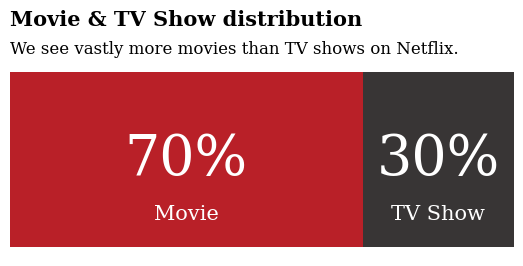

In [113]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Movie')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)

# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')

# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.savefig('figures/Movie_TV_Show_distribution.png', bbox_inches='tight', dpi=300)
plt.show()

In [114]:
# Interactive Release Year Trends by Type
agg_df = df.groupby(['release_year', 'type']).size().reset_index(name='count')

fig = px.line(
    agg_df, 
    x='release_year', 
    y='count', 
    color='type', 
    title='Release Year Trends by Type (Interactive)',
    labels={'release_year': 'Release Year', 'count': 'Count'},
    color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'}  # Palette
)
fig.update_xaxes(range=[2000, 2021])
fig.update_layout(
    font_family='serif',
    title_font_size=15,
    title_font_weight='bold',
    title_x=0.5,
    legend_title_font_size=12,
    legend_title_font_weight='bold',
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    legend_font_size=10
)
fig.write_image('figures/Release_Year_Trends_by_Type_Interactive.png', scale=2)
fig.show()

In [115]:
# Helper column for various plots
df['count'] = 1

# Many productions have several countries listed - this will skew our results , we'll grab the first one mentioned

# Lets retrieve just the first country
df['first_country'] = df['country'].str.split(",").str[0]
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly (thank you!)

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

# Genre
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

# Reducing name length
df['first_country'] = df['first_country'].replace('United States', 'USA')
df['first_country'] = df['first_country'].replace('United Kingdom', 'UK')
df['first_country'] = df['first_country'].replace('South Korea', 'S. Korea')

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/134037463.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



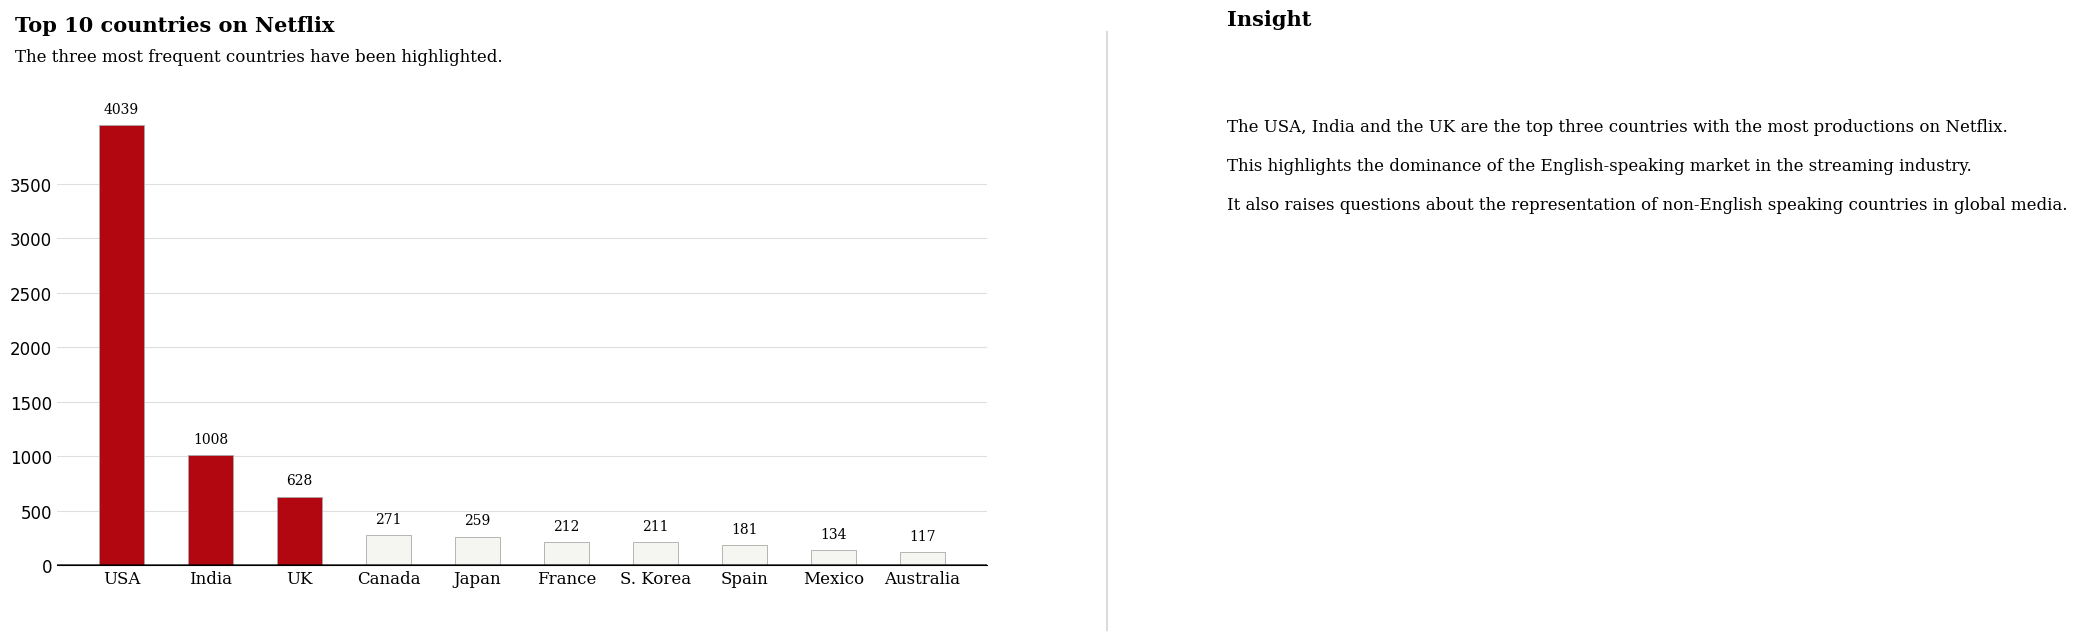

In [116]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

# Plot
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1] = color_map[2] =  '#b20710' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 150), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Top 10 countries on Netflix', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'The three most frequent countries have been highlighted.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
The USA, India and the UK are the top three countries with the most productions on Netflix.

This highlights the dominance of the English-speaking market in the streaming industry.

It also raises questions about the representation of non-English speaking countries in global media.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 4000, 500) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels

#plt.xlabel("Country", fontsize=12, fontweight='light', fontfamily='serif',loc='left',y=-1.5)
#plt.ylabel("Count", fontsize=12, fontweight='light', fontfamily='serif')
 #plt.legend(loc='upper right')
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/Top_10_countries_on_Netflix.png', bbox_inches='tight', dpi=300)
plt.show()

In [117]:
# Interactive Top 10 Countries by Content Count (Movie vs. TV Show)
top_countries = df['first_country'].value_counts().head(10).index
df_top = df[df['first_country'].isin(top_countries)]

type_by_country = df_top.groupby(['first_country', 'type']).size().unstack().fillna(0)
type_by_country = type_by_country.loc[top_countries]

# Convert to Plotly for interactivity
fig = px.bar(
    type_by_country.reset_index(), 
    x='first_country', 
    y=['Movie', 'TV Show'], 
    title='Movie vs. TV Show Distribution by Top 10 Countries',
    labels={'first_country': 'Country', 'value': 'Count', 'variable': 'Type'},
    color_discrete_map={'Movie': '#b20710', 'TV Show': '#221f1f'},
    barmode='stack'
)
fig.update_layout(
    font_family='serif',
    title_font_size=15,
    title_font_weight='bold',
    title_x=0.5,
    xaxis_title='Country',
    xaxis_title_font_size=12,
    yaxis_title='Count',
    yaxis_title_font_size=12,
    xaxis_tickangle=-45
)

fig.write_image('figures/Movie_vs_TV_Show_Distribution_by_Top_10_Countries.png', scale=2)
fig.show()

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/3461222535.py:16: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



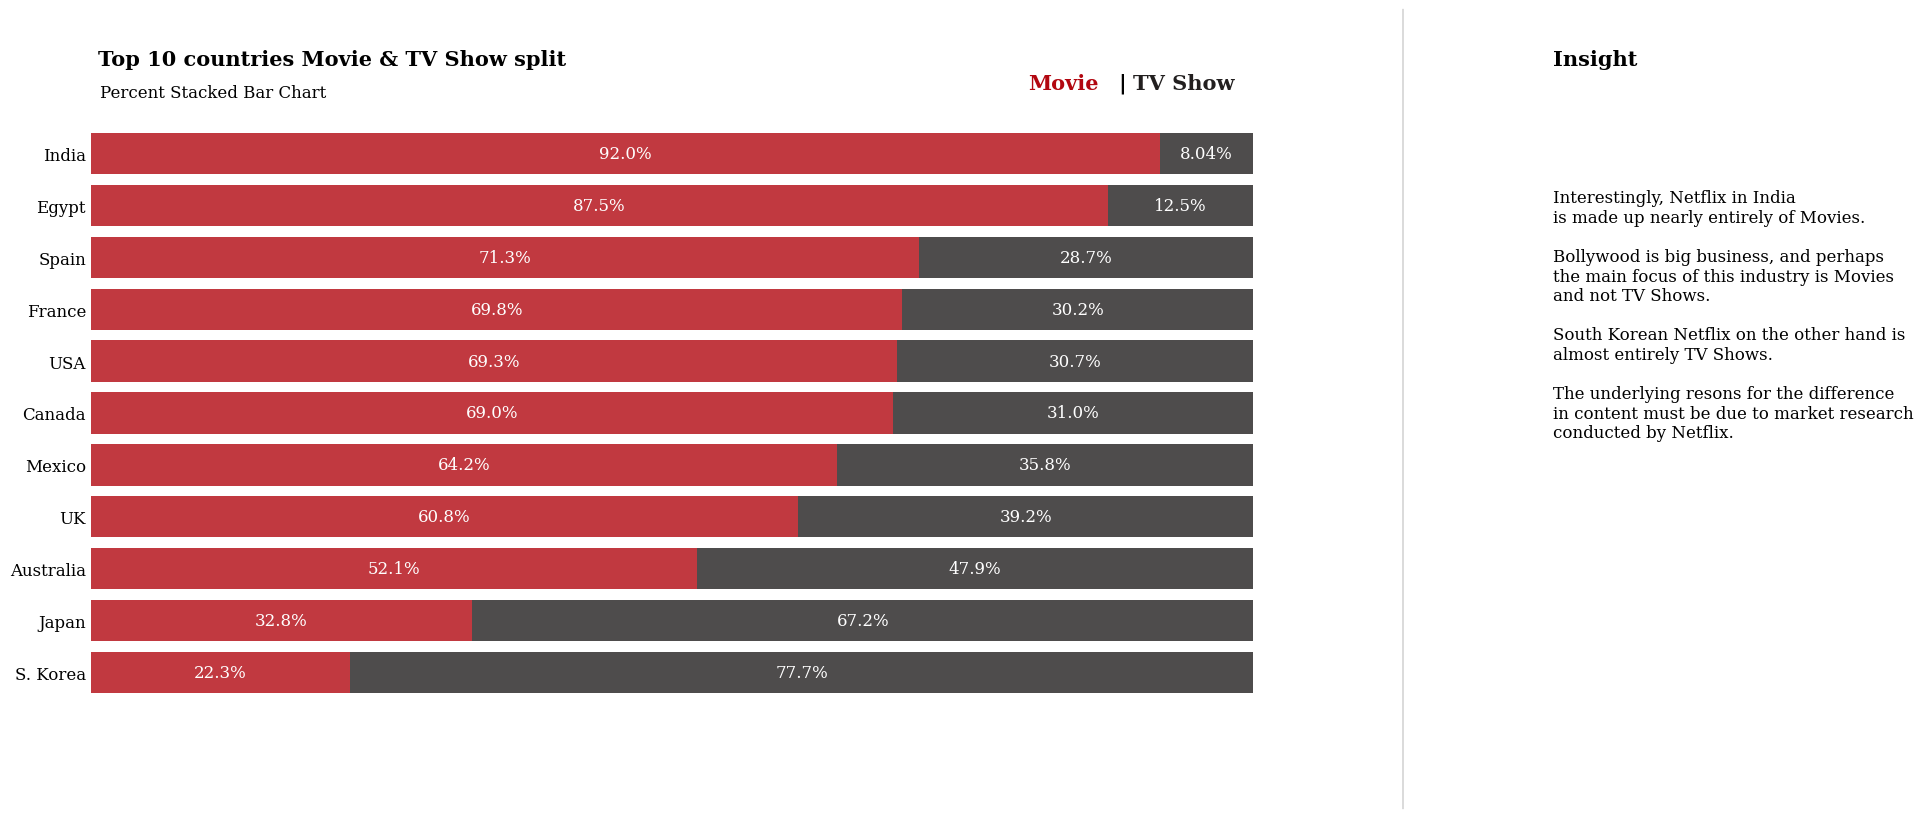

In [118]:
country_order = df['first_country'].value_counts()[:11].index
data_q2q3 = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data_q2q3['sum'] = data_q2q3.sum(axis=1)
data_q2q3_ratio = (data_q2q3.T / data_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

###
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['Movie'], 
        color='#b20710', alpha=0.8, label='Movie')
ax.barh(data_q2q3_ratio.index, data_q2q3_ratio['TV Show'], left=data_q2q3_ratio['Movie'], 
        color='#221f1f', alpha=0.8, label='TV Show')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(data_q2q3_ratio.index, fontfamily='serif', fontsize=11)

# male percentage
for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['Movie'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

for i in data_q2q3_ratio.index:
    ax.annotate(f"{data_q2q3_ratio['TV Show'][i]*100:.3}%", 
                   xy=(data_q2q3_ratio['Movie'][i]+data_q2q3_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',
                   color='white')

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize=15, fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

fig.text(0.75,0.9,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.81,0.9,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.82,0.9,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

fig.text(1.1, 0.93, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.44, '''
Interestingly, Netflix in India 
is made up nearly entirely of Movies. 

Bollywood is big business, and perhaps
the main focus of this industry is Movies
and not TV Shows.

South Korean Netflix on the other hand is 
almost entirely TV Shows.

The underlying resons for the difference 
in content must be due to market research
conducted by Netflix.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/Top_10_countries_Movie_TV_Show_split.png', bbox_inches='tight', dpi=300)
plt.show()

In [119]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
rating_order = list(order['rating'])

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/401417856.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



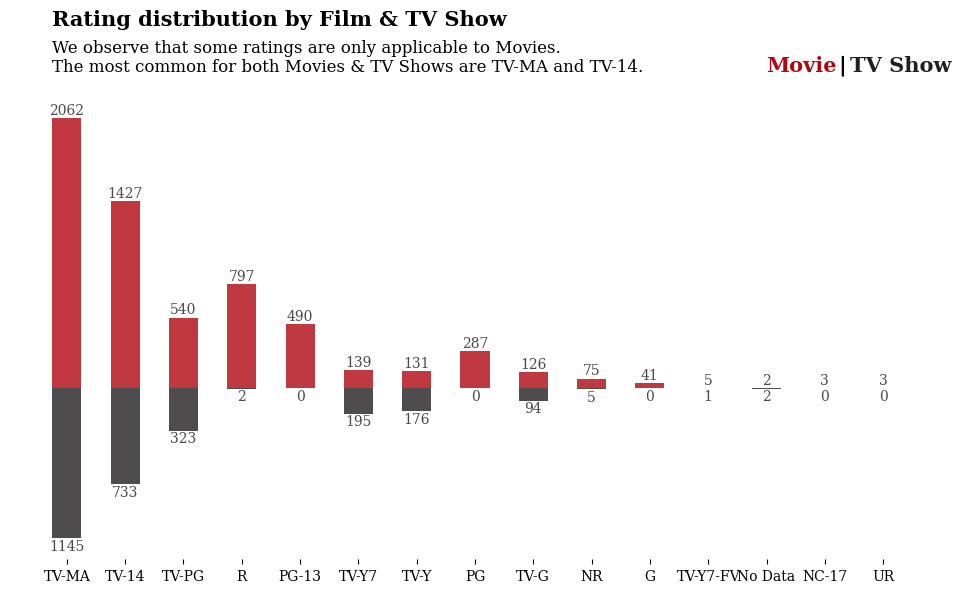

In [120]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)[rating_order]

movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(movie.index, movie, width=0.5, color='#b20710', alpha=0.8, label='Movie')
ax.bar(tv.index, tv, width=0.5, color='#221f1f', alpha=0.8, label='TV Show')
#ax.set_ylim(-35, 50)

# Annotations
for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')   

for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60),
                   va = 'center', ha='center',fontweight='light', fontfamily='serif',
                   color='#4a4a4a')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

ax.set_xticklabels(mf.columns, fontfamily='serif')
ax.set_yticks([])    

ax.legend().set_visible(False)
fig.text(0.16, 1, 'Rating distribution by Film & TV Show', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.89, 
'''We observe that some ratings are only applicable to Movies. 
The most common for both Movies & TV Shows are TV-MA and TV-14.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.755,0.924,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.815,0.924,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.825,0.924,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

plt.savefig('figures/Rating_distribution_by_Film_TV_Show.png', bbox_inches='tight', dpi=300)
plt.show()

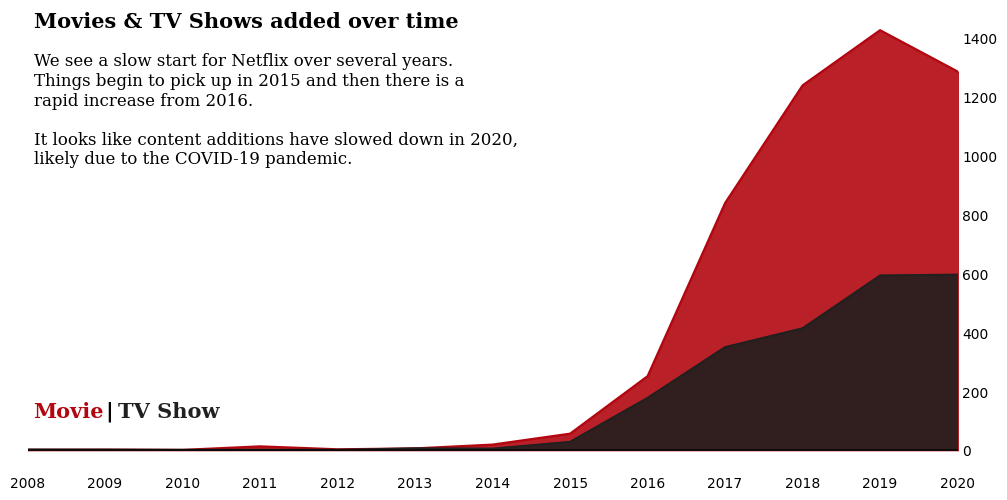

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = df[df['type']==mtv]['year_added'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19 pandemic.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/Movies_TV_Shows_added_over_time.png', bbox_inches='tight', dpi=300)
plt.show()

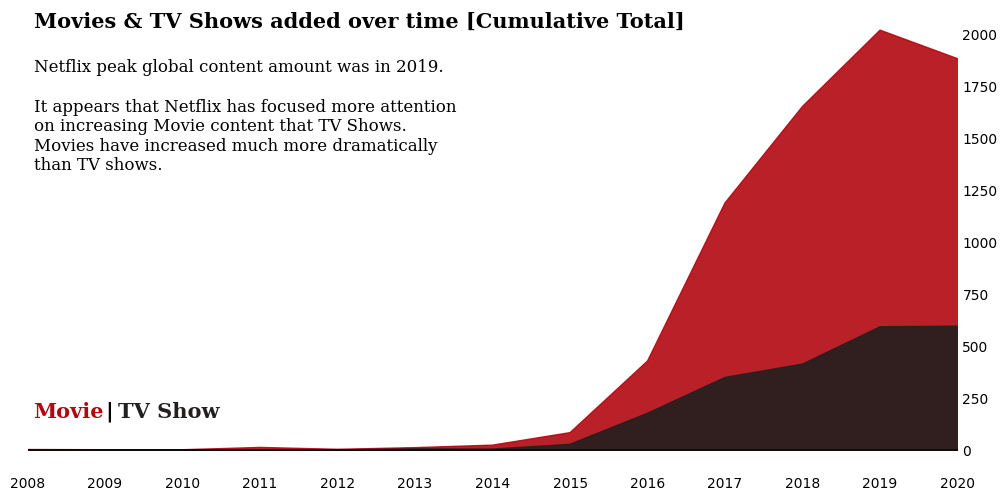

In [122]:
data_sub = df.groupby('type')['year_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''Netflix peak global content amount was in 2019.

It appears that Netflix has focused more attention
on increasing Movie content that TV Shows. 
Movies have increased much more dramatically
than TV shows.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/Movies_TV_Shows_added_over_time_[Cumulative_Total].png', bbox_inches='tight', dpi=300)
plt.show()

In [123]:
month_order = ['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

df['month_name_added'] = pd.Categorical(df['month_name_added'], categories=month_order, ordered=True)

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/146548358.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



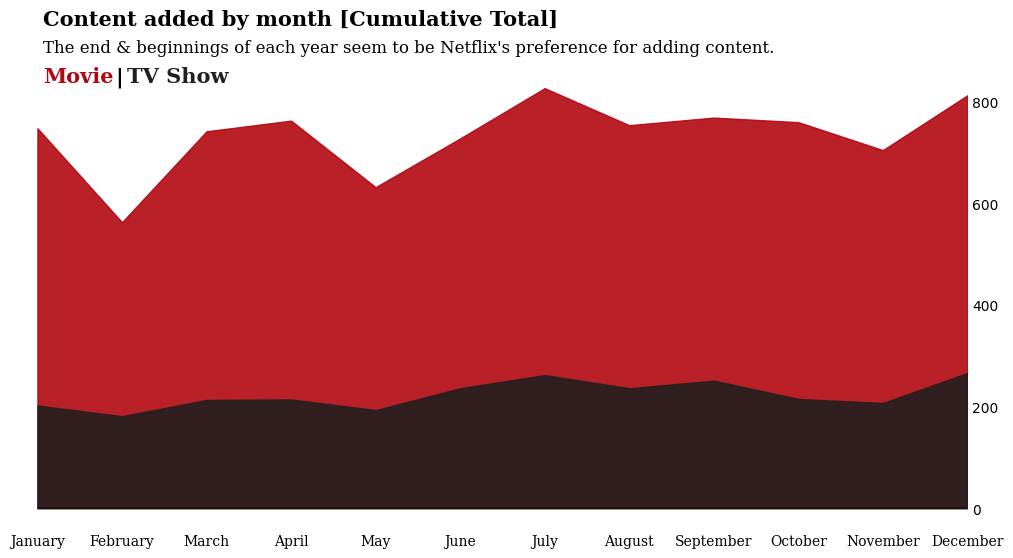

In [124]:
data_sub = df.groupby('type')['month_name_added'].value_counts().unstack().fillna(0).loc[['TV Show','Movie']].cumsum(axis=0).T

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(df['type'].value_counts().index):
    mtv_rel = data_sub[mtv]
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], label=mtv,alpha=0.9)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

#ax.set_xlim(2008,2020)
#plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.95, 'Content added by month [Cumulative Total]', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.905, 
"The end & beginnings of each year seem to be Netflix's preference for adding content."

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.855,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.855,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.855,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/Content_added_by_month_Cumulative_Total.png', bbox_inches='tight', dpi=300)
plt.show()

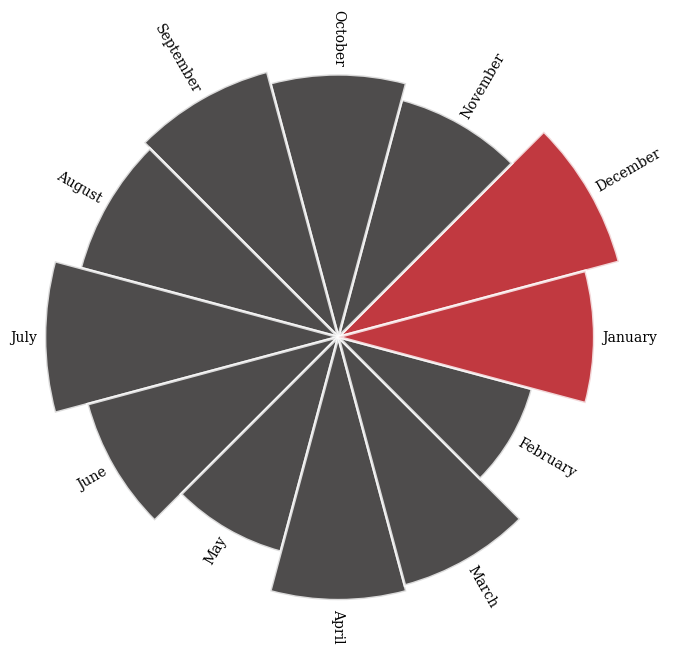

In [125]:
data_sub2 = data_sub

data_sub2['Value'] = data_sub2['Movie'] + data_sub2['TV Show']
data_sub2 = data_sub2.reset_index()

df_polar = data_sub2.sort_values(by='month_name_added',ascending=False)

color_map = ['#221f1f' for _ in range(12)]
color_map[0] = color_map[11] =  '#b20710' # color highlight

# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_polar["month_name_added"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

In [126]:
# Genres
from sklearn.preprocessing import MultiLabelBinarizer 
import matplotlib.colors

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
plt.show()

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/3766057234.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


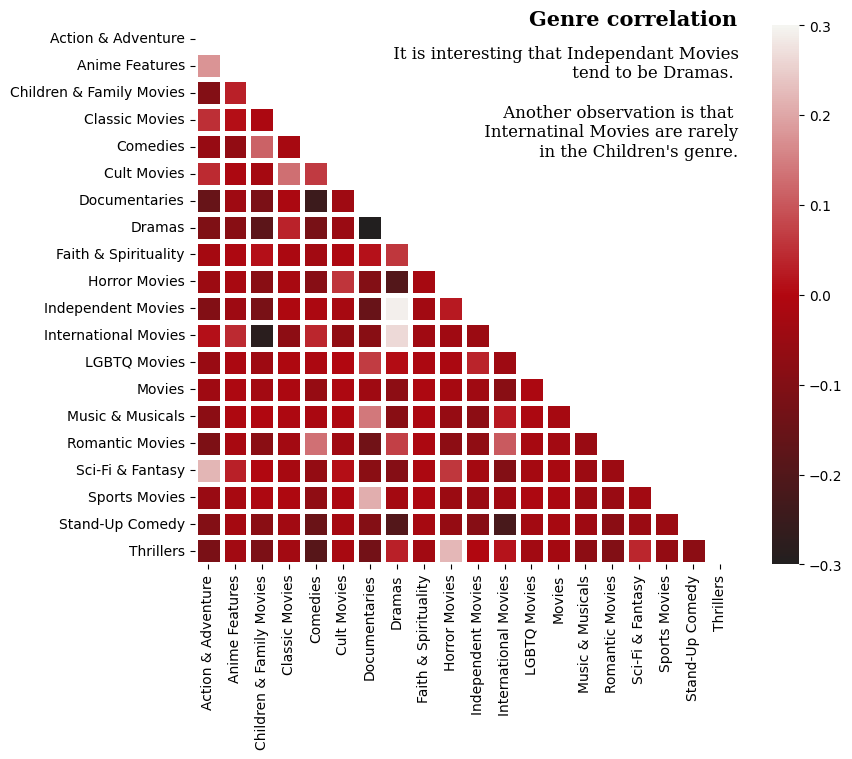

In [127]:
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]

genre_heatmap(df_movies, 'Movie')
plt.savefig('figures/Genre_correlation.png', bbox_inches='tight', dpi=300)
plt.show()

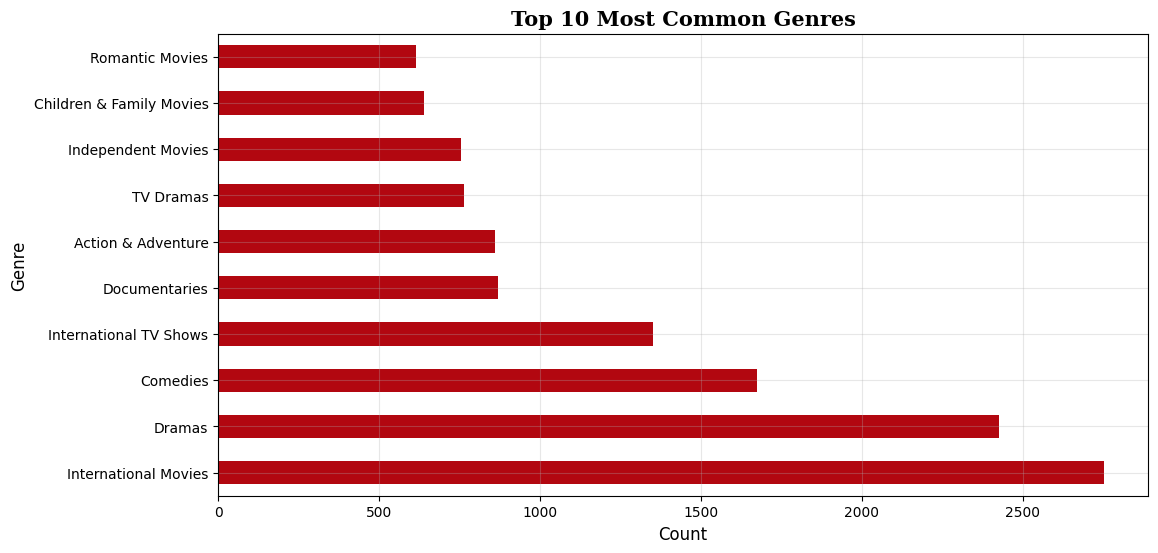

In [128]:
# Visualize listed_in genres (e.g., most common genres)
all_genres = df['listed_in'].str.split(', ').explode().value_counts().head(10)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
all_genres.plot(kind='barh', ax=ax, color='#b20710')
ax.set_title('Top 10 Most Common Genres', fontsize=15, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Genre', fontsize=12)
ax.grid(True, alpha=0.3)

plt.savefig('figures/Top_10_Most_Common_Genres.png', bbox_inches='tight', dpi=300)
plt.show()

In [129]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
data = data.index

df_heatmap = df.loc[df['first_country'].isin(data)]

In [130]:
df_heatmap = pd.crosstab(df_heatmap['first_country'],df_heatmap['target_ages'],normalize = "index").T

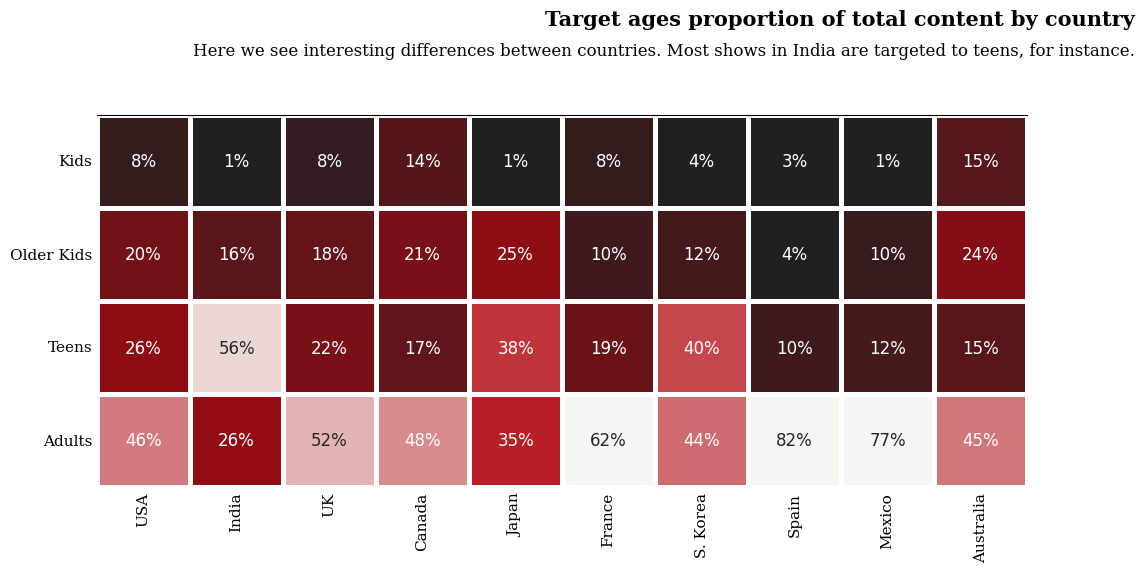

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Dynamically get the top 10 countries to match the actual data
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
country_order2 = data.index.tolist()

age_order = ['Kids','Older Kids','Teens','Adults']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)

fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   
fig.text(0.99, 0.7, 'Here we see interesting differences between countries. Most shows in India are targeted to teens, for instance.',ha='right', fontsize=12,fontfamily='serif') 

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.savefig('figures/Target_ages_proportion_of_total_content_by_country.png', bbox_inches='tight', dpi=300)
plt.show()

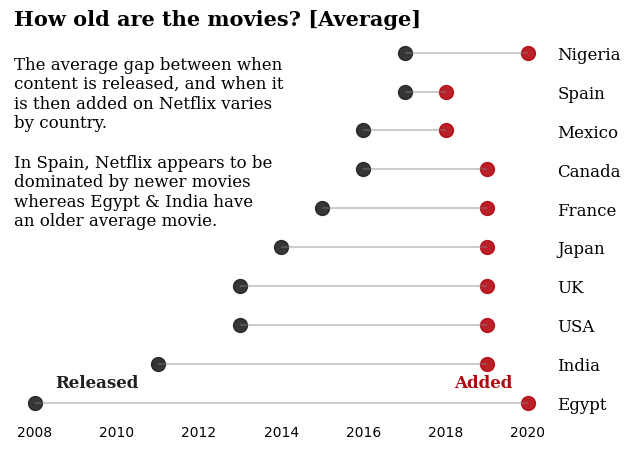

In [132]:
# Data
df_movies
df_tv

### Relevant groupings

data = df_movies.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_movies.loc[df_movies['first_country'].isin(data)]

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round()

# Reorder it following the values of the first value
ordered_df = loli.sort_values(by='release_year')

ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the movies? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

# Removes the tick marks but keeps the labels
ax.tick_params(axis=u'both', which=u'both',length=0)
# Move Y axis to the right side
ax.yaxis.tick_right()

plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

# Custome legend
fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')
fig.text(0.76,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

fig.text(0.13, 0.46, 
'''The average gap between when 
content is released, and when it
is then added on Netflix varies
by country. 

In Spain, Netflix appears to be 
dominated by newer movies 
whereas Egypt & India have
an older average movie.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

#plt.xlabel('Year')
#plt.ylabel('Country')

plt.savefig('figures/How_old_are_the_movies_Average.png', bbox_inches='tight', dpi=300)
plt.show()

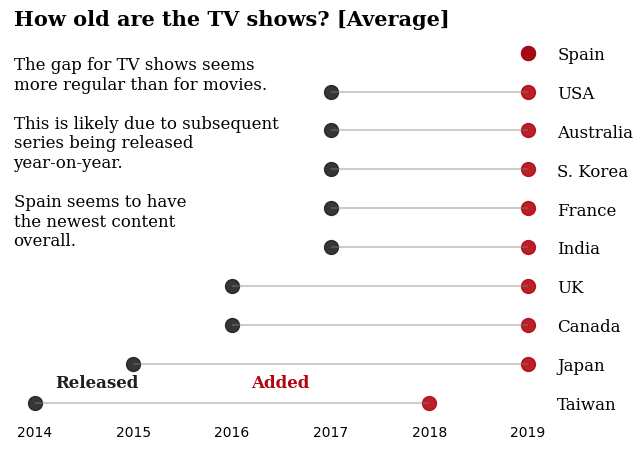

In [133]:
data = df_tv.groupby('first_country')['count'].sum().sort_values(ascending=False).reset_index()[:10]
data = data['first_country']
df_loli = df_tv.loc[df_tv['first_country'].isin(data)]

loli = df_loli.groupby('first_country')[['release_year','year_added']].mean().round()

# Reorder it following the values of the first value:
ordered_df = loli.sort_values(by='release_year')
ordered_df_rev = loli.sort_values(by='release_year',ascending=False)

my_range=range(1,len(loli.index)+1)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

fig.text(0.13, 0.9, 'How old are the TV shows? [Average]', fontsize=15, fontweight='bold', fontfamily='serif')
plt.hlines(y=my_range, xmin=ordered_df['release_year'], xmax=ordered_df['year_added'], color='grey', alpha=0.4)
plt.scatter(ordered_df['release_year'], my_range, color='#221f1f',s=100, alpha=0.9, label='Average release date')
plt.scatter(ordered_df['year_added'], my_range, color='#b20710',s=100, alpha=0.9 , label='Average added date')
#plt.legend()

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
ax.yaxis.tick_right()
plt.yticks(my_range, ordered_df.index)
plt.yticks(fontname = "serif",fontsize=12)

fig.text(0.19,0.175,"Released", fontweight="bold", fontfamily='serif', fontsize=12, color='#221f1f')

fig.text(0.47,0.175,"Added", fontweight="bold", fontfamily='serif', fontsize=12, color='#b20710')

fig.text(0.13, 0.42, 
'''The gap for TV shows seems
more regular than for movies.

This is likely due to subsequent
series being released
year-on-year.

Spain seems to have
the newest content
overall.
'''

, fontsize=12, fontweight='light', fontfamily='serif')

ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.xlabel('Value of the variables')
#plt.ylabel('Group')

plt.savefig('figures/How_old_are_the_TV_shows_Average.png', bbox_inches='tight', dpi=300)
plt.show()

In [134]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T

/var/folders/rp/11xnqy7s0rnfhnsdndvw322w0000gp/T/ipykernel_15939/2076253257.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



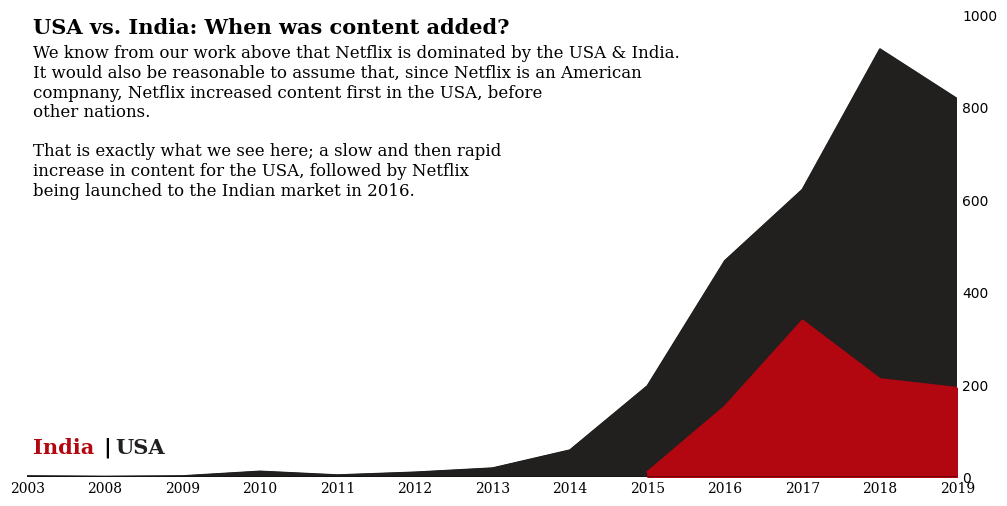

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ['#221f1f', '#b20710','#f5f5f1']

for i, hs in enumerate(us_ind['first_country'].value_counts().index):
    hs_built = us_ind[us_ind['first_country']==hs]['year_added'].value_counts().sort_index()
    ax.plot(hs_built.index, hs_built, color=color[i], label=hs)
    #ax.fill_between(hs_built.index, 0, hs_built, color=color[i], alpha=0.4)
    ax.fill_between(hs_built.index, 0, hs_built, color=color[i], label=hs)

ax.set_ylim(0, 1000)
#ax.legend(loc='upper left')
for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .4)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)
ax.set_xticklabels(data_sub.index, fontfamily='serif', rotation=0)
ax.margins(x=0) # remove white spaces next to margins

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'USA vs. India: When was content added?', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.58, 
'''
We know from our work above that Netflix is dominated by the USA & India.
It would also be reasonable to assume that, since Netflix is an American
compnany, Netflix increased content first in the USA, before 
other nations. 

That is exactly what we see here; a slow and then rapid
increase in content for the USA, followed by Netflix 
being launched to the Indian market in 2016.'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.13,0.15,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.188,0.15,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.198,0.15,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.savefig('figures/USA_vs_India_When_was_content_added.png', bbox_inches='tight', dpi=300)
plt.show()

In [136]:
us_ind = df[(df['first_country'] == 'USA') | (df['first_country'] == 'India' )]

data_sub = df.groupby('first_country')['year_added'].value_counts().unstack().fillna(0).loc[['USA','India']].cumsum(axis=0).T
data_sub.insert(0, "base", np.zeros(len(data_sub)))

data_sub = data_sub.add(-us_ind['year_added'].value_counts()/2, axis=0)

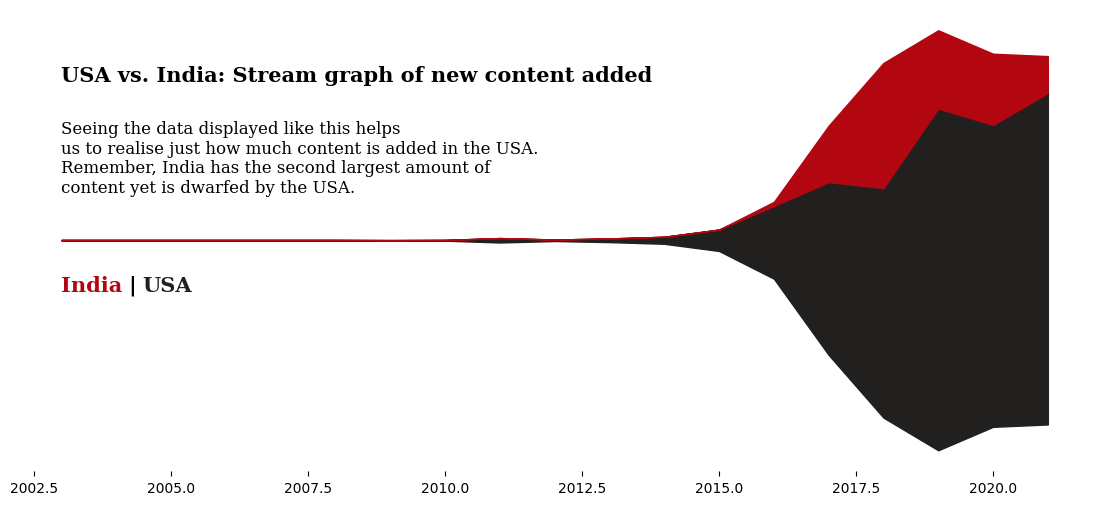

In [137]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
color = ['#b20710','#221f1f'][::-1]
hs_list = data_sub.columns
hs_built = data_sub[hs]

for i, hs in enumerate(hs_list):
    if i == 0 : continue
    ax.fill_between(hs_built.index, data_sub.iloc[:,i-1], data_sub.iloc[:,i], color=color[i-1])
    
for s in ['top', 'right', 'bottom', 'left']:
    ax.spines[s].set_visible(False)
ax.set_axisbelow(True)
ax.set_yticks([])
#ax.legend(loc='upper left')
ax.grid(False)

fig.text(0.16, 0.76, 'USA vs. India: Stream graph of new content added', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.575, 
'''
Seeing the data displayed like this helps 
us to realise just how much content is added in the USA.
Remember, India has the second largest amount of
content yet is dwarfed by the USA.'''

, fontsize=12, fontweight='light', fontfamily='serif')

fig.text(0.16,0.41,"India", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.208,0.41,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.218,0.41,"USA", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'y', which=u'both',length=0)

plt.savefig('figures/USA_vs_India_Stream_graph_of_new_content_added.png', bbox_inches='tight', dpi=300)
plt.show()

In [138]:
# Simple Interactive Dashboard
# Prepare data for each subplot
# Top Countries: Bar chart of top 10 countries by content count
top_countries_data = df.groupby('first_country')['count'].sum().sort_values(ascending=False).head(10).reset_index()

# Release Trends: Line chart of release year trends by type
release_trends_data = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Genre Distribution: Bar chart of top 10 genres
genre_data = df['listed_in'].str.split(', ').explode().value_counts().head(10).reset_index()
genre_data.columns = ['genre', 'count']

# Rating Breakdown: Pie chart of ratings by count
rating_data = df.groupby('rating')['count'].sum().reset_index()

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Top Countries', 'Release Trends', 'Genre Distribution', 'Rating Breakdown'),
    specs=[[{"type": "bar"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "pie"}]]
)

# Add Top Countries bar chart
fig.add_trace(
    go.Bar(
        x=top_countries_data['first_country'], 
        y=top_countries_data['count'], 
        marker_color='#b20710',
        name='Top Countries'
    ), 
    row=1, col=1
)

# Add Release Trends line chart
for t in release_trends_data['type'].unique():
    subset = release_trends_data[release_trends_data['type'] == t]
    fig.add_trace(
        go.Scatter(
            x=subset['release_year'], 
            y=subset['count'], 
            mode='lines+markers', 
            name=t,
            line=dict(color='#b20710' if t == 'Movie' else '#221f1f')
        ), 
        row=1, col=2
    )

# Add Genre Distribution bar chart
fig.add_trace(
    go.Bar(
        x=genre_data['count'], 
        y=genre_data['genre'], 
        orientation='h',
        marker_color='#e50914',
        name='Genres'
    ), 
    row=2, col=1
)

# Add Rating Breakdown pie chart
fig.add_trace(
    go.Pie(
        labels=rating_data['rating'], 
        values=rating_data['count'], 
        marker_colors=['#221f1f', '#b20710', '#e50914', '#f5f5f1'] * (len(rating_data) // 4 + 1),
        name='Ratings'
    ), 
    row=2, col=2
)

fig.update_layout(
    height=800, 
    title_text="Netflix Interactive EDA Dashboard", 
    font_family='serif',
    title_font_size=20,
    title_font_weight='bold',
    title_x=0.5,
    title_font_color='#221f1f'
)

fig.write_image('figures/Top_Countries_Release_Trends_Genre_Distribution_Rating_Breakdown.png', scale=2)
fig.show()

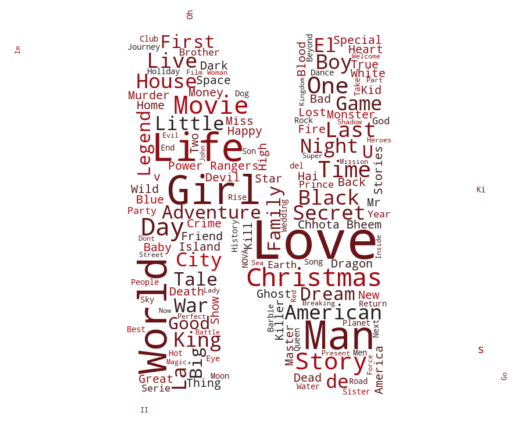

In [139]:
from wordcloud import WordCloud
from PIL import Image

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])

text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

mask = np.array(Image.open('images/netflix-logo-transparent.png'))

wordcloud = WordCloud(background_color = 'white', width = 500,  height = 200,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

plt.savefig('figures/netflix_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

# Conclusion

This exploratory data analysis provided a comprehensive overview of Netflix's global content catalog, revealing key trends in country production, release patterns, genre popularity, and audience ratings. The interactive dashboard and visualizations, styled with the Netflix palette, make it easy to identify:
- The dominance of the USA, India, and the UK in content production
- The rapid growth in content releases post-2015
- The prevalence of genres like Drama and International Movies
- The distribution of content across different audience ratings

These insights can inform both business strategy and further research into content trends and audience preferences on Netflix.

# Future Work: Metadata Enrichment

The next phase of this project will be covered in the `matadata_enrichment.ipynb` notebook. Future work will focus on:
- Enriching the dataset with additional metadata (e.g., cast, directors, awards, external ratings)
- Integrating external data sources (such as IMDb or TMDb)
- Building advanced recommendation systems and content similarity analyses
- Exploring deeper relationships between content attributes and user engagement

_Proceed to the `matadata_enrichment.ipynb` notebook to continue the analysis and unlock further insights from enriched metadata!_